# Gradient Descent With No Constant
- Gradient descent is an iterative optimization algorithm, crucial in machine learning, that finds the minimum of a function (like a cost/loss function) by taking repeated steps in the opposite direction of the function's gradient (steepest descent), adjusting model parameters (weights/biases) to minimize errors between predictions and actual data, effectively training the model to improve accuracy.

In [10]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [11]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

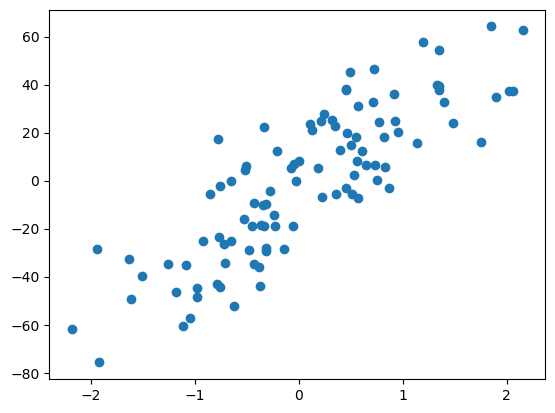

In [12]:
plt.scatter(X,y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [16]:
y_pred = lr.predict(X_test)

In [17]:
from sklearn.metrics import r2_score
print('R2 Score : ', r2_score(y_test, y_pred))

R2 Score :  0.6345158782661012


In [19]:
class GDRegressor:

    def __init__(self, learning_rate, epochs):
        self.m = 100   #initialization random values for m and b
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs 

    def fit(self, X, y):
        #calculate 'b' using Gradient Descent(GD)
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b) * X.ravel())
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)           
               
        print(self.m, self.b)

    def predict(self, X):
        return self.m * X + self.b

In [23]:
gd = GDRegressor(0.001,50)

In [24]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [25]:
# Prediction
y_pred = gd.predict(X_test)

from sklearn.metrics import r2_score
print('R2 Score : ', r2_score(y_test, y_pred))

R2 Score :  0.6343842836315579


# How to move in the right direction when m=100 and b=-120

In [81]:
%matplotlib notebook

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_regression

In [83]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)
X = X.flatten()
y = y.flatten()

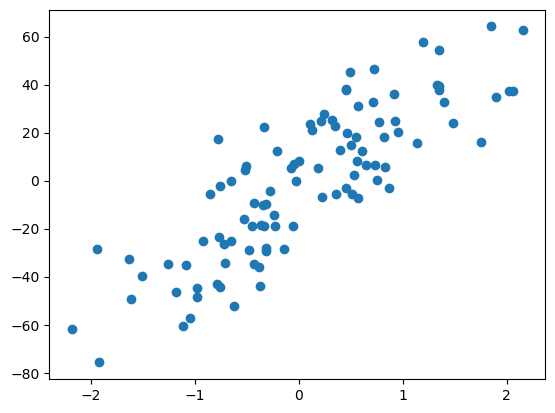

In [87]:
%matplotlib inline
plt.scatter(X, y)
plt.show()

# Example 1    ->  By taking the value of m = 100 and b = -120

In [88]:
b = -120
m = 100
lr = 0.001

all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
   
    for j in range(X.shape[0]):
        slope_b = slope_b - 2 * (y[j] - (m * X[j]) - b)
        slope_m = slope_m - 2 * (y[j] - (m * X[j]) - b) * X[j]
        cost = cost + (y[j] - (m*X[j]) - b)**2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

In [92]:
fig, ax = plt.subplots(figsize=(8,4))
#fig.set_tight_Layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) - 150
ax.scatter(X,y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i+1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    #return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=5000)

from IPython.display import HTML
HTML(anim.to_jshtml())

#f = r"animated4.gif"
#writergif = animation.PillowWriter(fps=2)
#anim.save(f, writer=writergif)

# Example 2   ->  By Changing the value of m and b

In [94]:
b = -520
m = 600
lr = 0.001

all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
   
    for j in range(X.shape[0]):
        slope_b = slope_b - 2 * (y[j] - (m * X[j]) - b)
        slope_m = slope_m - 2 * (y[j] - (m * X[j]) - b) * X[j]
        cost = cost + (y[j] - (m*X[j]) - b)**2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)


fig, ax = plt.subplots(figsize=(8,4))
#fig.set_tight_Layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) - 150
ax.scatter(X,y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i+1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    #return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=5000)

from IPython.display import HTML
HTML(anim.to_jshtml())

#f = r"animated4.gif"
#writergif = animation.PillowWriter(fps=2)
#anim.save(f, writer=writergif)